<a href="https://colab.research.google.com/github/manvgom/IML/blob/main/IML_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargar los datos del repositorio de github

In [1]:
!git clone https://github.com/manvgom/IML.git
!unzip -qo IML/iml_db.zip -d IML

Cloning into 'IML'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


Generar un único dataset de los 3 ficheros excel.


*   dmg1.xlsx = Contiene las mediciones de daños en la ubicación d1 de la estructura
*   dmg2.xlsx = Contiene las mediciones de daños en la ubicación d2 de la estructura
*   undamaged = Contiene las mediciones en todas las ubicaciones de la estructura antes de recibir daños.





In [2]:
import pandas as pd

data = pd.DataFrame([])
header = ["D1"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/undamaged.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=["Undamaged"]*a.shape[0]  
    data = data.append(a, ignore_index=True)

header = ["D2"]   
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/undamaged.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=["Repaired"]*a.shape[0]  
    data = data.append(a, ignore_index=True)
    
header = ["D01-01R","D01-02R","D01-03R","D01-04R","D01-05R","D01-06R","D01-71R","D01-72R","D01-73R","D01-74R","D01-11R","D01-15R"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/dmg1.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=[header[x]]*a.shape[0]  
    data = data.append(a, ignore_index=True)    
    
header = ["D02-03R","D02-06R","D02-12R","D02-15R","D02-23R"]
for x in range (len(header)):
    a = pd.read_excel("IML/iml_db/dmg2.xlsx", sheet_name=header[x], header=0, index_col=0)
    a['Damage']=[header[x]]*a.shape[0]  
    data =data.append(a, ignore_index=True)

data

,A4_1200,A4_1600,A4_2000,A4_2400,A4_2800,A4_3200,A4_3600,A4_4000,A1_1200,A1_1600,...,C17_4000,C20_1200,C20_1600,C20_2000,C20_2400,C20_2800,C20_3200,C20_3600,C20_4000,Damage
0,21.330,28.988,33.400,42.591,48.187,54.895,61.142,66.716,9.252,11.725,...,-91.801,-10.721,-17.779,-27.148,-37.378,-50.461,-64.025,-78.638,-97.905,Undamaged
1,21.790,28.930,35.280,42.396,48.418,54.507,62.014,67.965,9.336,12.324,...,-91.436,-10.725,-17.218,-27.063,-38.108,-50.113,-64.028,-78.576,-98.586,Undamaged
2,21.010,29.617,35.009,41.880,47.598,54.194,60.671,67.594,8.164,11.629,...,-91.116,-11.546,-16.765,-26.679,-38.403,-51.005,-63.892,-79.374,-97.418,Undamaged
3,20.887,28.375,35.733,41.507,48.071,56.031,60.445,65.796,7.928,11.960,...,-92.035,-11.904,-18.548,-26.860,-38.007,-49.187,-63.422,-79.623,-97.843,Undamaged
4,21.358,28.122,35.355,41.633,49.077,54.956,61.175,66.645,8.002,11.466,...,-91.382,-12.186,-18.134,-27.050,-37.012,-50.623,-64.160,-79.543,-99.628,Undamaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,20.757,29.402,36.224,41.864,48.205,58.391,63.888,70.550,8.660,13.099,...,-89.412,-14.598,-21.238,-29.613,-39.880,-52.657,-64.769,-78.568,-96.130,D02-23R
3796,21.563,29.395,36.162,42.998,49.319,57.163,63.878,70.942,10.300,13.119,...,-89.882,-13.004,-21.002,-30.989,-41.024,-52.213,-65.462,-79.373,-93.594,D02-23R
3797,21.477,29.119,36.268,42.527,49.202,56.564,64.255,70.026,9.972,12.281,...,-90.055,-14.029,-21.398,-28.946,-41.328,-51.072,-66.116,-79.313,-94.095,D02-23R
3798,22.135,29.213,36.188,43.633,48.807,57.469,63.544,70.002,8.420,12.323,...,-91.109,-14.401,-21.566,-29.438,-40.674,-53.557,-63.830,-79.615,-94.357,D02-23R


Modificar el dataset original para obtener el subconjunto de entreno y el de test.

El subconjunto de entreno se forma con muestras de la estructura no dañada ya que nuestro objetivo es detectar si se ha sufrido daños.

In [20]:
from sklearn.model_selection import train_test_split

tag_train = ["Undamaged"]

tag_test = ["D01-01R","D01-02R","D01-03R","D01-04R","D01-05R",
           "D01-06R","D01-71R","D01-72R","D01-73R","D01-74R","D01-11R",
           "D01-15R","D02-03R","D02-06R","D02-12R","D02-15R","D02-23R"]

for x in range (len(tag_train)):
   X_und = data[data['Damage']==tag_train[x]] 

X_train, X_test = train_test_split(X_und,test_size=0.1, random_state=2) 

for x in range (len(tag_test)):  
   X_test=X_test.append(data[data['Damage']==tag_test[x]], ignore_index=True)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.loc[:, X_train.columns != 'Damage']) 
X_test_scaled = scaler.transform(X_test.loc[:, X_test.columns != 'Damage'])
print("X_train_scaled %s" %(X_train_scaled.shape, ) + "\n" +"X_test_scaled %s" %(X_test_scaled.shape,) )
print("X_train %s" %(X_train.shape, ) + "\n" +"X_test %s" %(X_test.shape,) )


X_train_scaled (180, 160)
X_test_scaled (3420, 160)
X_train (180, 161)
X_test (3420, 161)


Para determinar el número de componentes principales necesarias para implementar el PCA, se observa la varianza acumulada y se ve que 90 componentes contienen el 94,8% de la información del dataset.

Varianza Acumulada: 0.9483861524361377 

Varianza Acumulada Total: 1.0000000000000007 



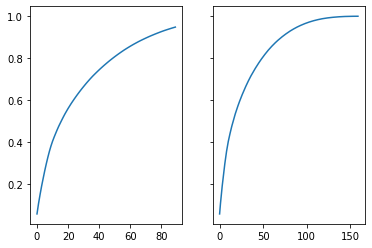

In [40]:
import numpy as np
from sklearn.decomposition import PCA

numcomp = 90
numcomp_total = 160

modelPCA = PCA(n_components=numcomp)
modelPCA.fit(X_train_scaled)

modelPCA_total = PCA(n_components=numcomp_total)
modelPCA_total.fit(X_train_scaled)

print(f"Varianza Acumulada: {str(sum(modelPCA.explained_variance_ratio_))} \n")
print(f"Varianza Acumulada Total: {str(sum(modelPCA_total.explained_variance_ratio_))} \n")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.lineplot(data=np.cumsum(modelPCA.explained_variance_ratio_), ax = ax1)
sns.lineplot(data=np.cumsum(modelPCA_total.explained_variance_ratio_), ax = ax2)

Se implementa el modelo PCA y se obtiene la matriz de las primeras 90 componentes principales que más información contienen.

In [41]:
pcs=['PC{}'.format(i) for i in range(1, numcomp+1)]
scores_X_train = pd.DataFrame(modelPCA.transform(X_train_scaled),columns=pcs)
scores_X_test = pd.DataFrame(modelPCA.transform(X_test_scaled),columns=pcs)
scores_X_train['Damage']=['Train_' + tag_train[0]]*scores_X_train.shape[0]  
scores_X_test['Damage']=X_test.Damage
scores=scores_X_train.append(scores_X_test, ignore_index=True)
scores.reset_index(drop=True, inplace=True)
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,Damage
0,2.219917,5.082664,-2.741315,-1.895634,3.096524,0.412458,-1.414022,-2.405760,-3.429380,-0.362954,...,-0.104531,-0.138405,0.940232,-0.524669,-0.183307,-0.943543,-0.319299,0.443148,-0.789762,Train_Undamaged
1,3.815740,3.454575,1.808368,3.191314,0.429919,-2.797998,-1.105525,-1.799960,-0.354982,-1.514707,...,-0.203738,-0.610599,0.080446,0.645974,0.978936,-0.770035,0.023069,0.023480,-0.073094,Train_Undamaged
2,3.917280,2.934040,-4.416322,1.162590,-2.566897,-3.204440,3.297358,-2.061079,0.083187,1.573358,...,-0.211189,0.383729,-0.366430,0.255819,-0.044018,-0.158412,1.035121,0.591604,-0.243101,Train_Undamaged
3,4.540491,1.836222,4.905746,1.172085,-2.958146,3.491382,-0.943605,-1.547856,-0.446444,1.572967,...,-0.222122,0.350643,-0.429737,-0.891050,-0.162392,-0.772761,-0.382140,0.121730,0.466874,Train_Undamaged
4,-5.356339,-3.131908,-1.073673,-0.312796,0.386422,-2.975312,-0.636120,-1.033713,1.325063,-1.334154,...,-1.202474,-0.767953,-0.186710,0.242735,-0.586985,1.393151,-0.558292,0.624528,-0.283147,Train_Undamaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-8.229417,-3.726241,6.863308,-16.954813,4.020029,-7.135705,-5.462234,-7.272320,0.634104,-9.156792,...,1.131360,4.631522,-5.768561,3.295526,7.876387,7.241377,7.339765,-0.496787,3.425299,D02-23R
3596,-10.595677,-6.862679,8.317742,-14.856492,1.457659,1.008737,-2.211439,-10.696967,-4.158946,-7.743243,...,-0.301445,4.759822,-6.553226,3.411122,7.198557,8.042765,4.932845,-0.725590,3.193032,D02-23R
3597,-10.373848,-6.595442,7.842120,-10.658002,5.178421,-1.032635,-2.421165,-8.509835,0.237925,-9.685372,...,-0.800361,6.172276,-3.936330,2.966356,6.105741,7.278770,5.785790,-2.311047,2.322551,D02-23R
3598,-8.104213,-3.284586,5.244161,-14.087130,0.827531,-6.942868,-4.686791,-5.367358,0.533340,-10.140205,...,1.445258,5.217217,-4.425145,3.127540,6.153824,7.253947,5.331698,-1.100866,3.593612,D02-23R
